In [15]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# worked for numpy bool error
np.bool = np.bool_
##pip install --upgrade pandas openpyxl
##pip install openpyxl==3.0.7
##pip install --upgrade pandas


In [16]:
#data = pd.read_excel('Corona-Fallmeldungen-RLP-2023-01-05.xlsx',skiprows = 2, header=0)
# List of XLSX files to merge
file_names = ['Corona-Fallmeldungen-RLP-2023-01-02.xlsx', 'Corona-Fallmeldungen-RLP-2023-01-03.xlsx', 'Corona-Fallmeldungen-RLP-2023-01-04.xlsx', 'Corona-Fallmeldungen-RLP-2023-01-05.xlsx','Corona-Fallmeldungen-RLP-2023-01-06.xlsx','Corona-Fallmeldungen-RLP-2023-01-09.xlsx','Corona-Fallmeldungen-RLP-2023-01-10.xlsx','Corona-Fallmeldungen-RLP-2023-01-11.xlsx','Corona-Fallmeldungen-RLP-2023-01-12.xlsx','Corona-Fallmeldungen-RLP-2023-01-13.xlsx','Corona-Fallmeldungen-RLP-2023-01-16.xlsx', 'Corona-Fallmeldungen-RLP-2023-01-17.xlsx','Corona-Fallmeldungen-RLP-2023-01-18.xlsx', 'Corona-Fallmeldungen-RLP-2023-01-19.xlsx','Corona-Fallmeldungen-RLP-2023-01-20.xlsx','Corona-Fallmeldungen-RLP-2023-01-23.xlsx','Corona-Fallmeldungen-RLP-2023-01-24.xlsx','Corona-Fallmeldungen-RLP-2023-01-25.xlsx','Corona-Fallmeldungen-RLP-2023-01-26.xlsx','Corona-Fallmeldungen-RLP-2023-01-27.xlsx','Corona-Fallmeldungen-RLP-2023-01-30.xlsx','Corona-Fallmeldungen-RLP-2023-01-31.xlsx']
# Create an empty list to store the DataFrames
dfs = []


# Iterate through each file and read the data into a DataFrame
for file in file_names:
    # Read the Excel file into a DataFrame, skipping the first two rows
    df1 = pd.read_excel(file, header=None, skiprows=3)
    
    # Append the DataFrame to the list
    dfs.append(df1)

# Concatenate the DataFrames
merged_data = pd.concat(dfs, ignore_index=True)

# Get the unique column names from the first three rows
column_names = merged_data.iloc[:3].fillna('').astype(str).apply(' '.join, axis=0).str.strip()

# Set the column names for the DataFrame
merged_data.columns = column_names

# Skip the first three rows in the merged DataFrame
merged_data = merged_data.iloc[:].reset_index(drop=True)

# Write the merged data to a new Excel file
merged_data.to_excel('January_data.xlsx', index=False)



<ipython-input-16-6de51c51fd13>:29: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.2.9' currently installed).
  merged_data.to_excel('January_data.xlsx', index=False)


In [17]:
data = pd.read_excel('January_data.xlsx', header=0)

header_row1 = data.iloc[0]
header_row2 = data.iloc[1]
header_row3 = data.iloc[2]

combined_headers = []
for header1, header2, header3 in zip(header_row1, header_row2, header_row3):
    combined_headers.append(f'{header1} {header2} {header3}')

data.columns = combined_headers
data.columns = ['Kreis, Stand 5.1.2023(District)', 'Laborbestätigt, seit Beginn der Pandemie: Gesamt(Laboratory-confirmed, since the beginning of the pandemic:In Total)', 'Laborbestätigt:Differenz zum vorherigen Berichtstag(Difference to the previous reporting day)', 'Laborbestätigt:Hospitalisiert(hospitalized)', 'Laborbestätigt: Verstorben(Deceased)', 'Laborbestätigt: GenesenA(recovered)', 'Laborbestätigt: aktuelle FälleB(current cases)', 'Neue Meldefälle: Letzte 7 Tage(New reporting cases:Last 7 days)', 'Neue Meldefälle: Gleicher Zeitraum Vorwoche(New reoprting cases: Same period last week)', 'Inzidenz der letzten 7-Tage pro 100.000: Rheinland-Pfalz','+USAFD', '<20 Jahre','20-59 Jahre','≥ 60 Jahre','Inzidenz der letzten 7-Tage pro 100.000: Hospitalisierung in RLP +USAFD','Landkreis']



In [18]:
# Assuming 'data' is your DataFrame
data = data.rename(columns={'Kreis, Stand 5.1.2023(District)': 'Location', 'Laborbestätigt, seit Beginn der Pandemie: Gesamt(Laboratory-confirmed, since the beginning of the pandemic:In Total)': 'Lab confirmed total','Laborbestätigt:Differenz zum vorherigen Berichtstag(Difference to the previous reporting day)': 'Lab confirmed: difference to prev day','Laborbestätigt:Hospitalisiert(hospitalized)':'Hospitalized', 'Laborbestätigt: Verstorben(Deceased)':'Deceased', 'Laborbestätigt: GenesenA(recovered)':'Recovered','Laborbestätigt: aktuelle FälleB(current cases)':'Current_cases','Neue Meldefälle: Letzte 7 Tage(New reporting cases:Last 7 days)':'New reporting in 7 days','Neue Meldefälle: Gleicher Zeitraum Vorwoche(New reoprting cases: Same period last week)':'New reporting last week','Inzidenz der letzten 7-Tage pro 100.000: Rheinland-Pfalz':'Rheinland-Pfalz','Inzidenz der letzten 7-Tage pro 100.000: Hospitalisierung in RLP +USAFD':'Hospitalized in RLP'})
data.rename(columns={'Kreis, Stand 5.1.2023(District)': 'Location', 'Laborbestätigt, seit Beginn der Pandemie: Gesamt(Laboratory-confirmed, since the beginning of the pandemic:In Total)': 'Lab confirmed total','Laborbestätigt:Differenz zum vorherigen Berichtstag(Difference to the previous reporting day)': 'Lab confirmed: difference to prev day','Laborbestätigt:Hospitalisiert(hospitalized)':'Hospitalized', 'Laborbestätigt: Verstorben(Deceased)':'Deceased', 'Laborbestätigt: GenesenA(recovered)':'Recovered','Laborbestätigt: aktuelle FälleB(current cases)':'Current_cases','Neue Meldefälle: Letzte 7 Tage(New reporting cases:Last 7 days)':'New reporting in 7 days','Neue Meldefälle: Gleicher Zeitraum Vorwoche(New reoprting cases: Same period last week)':'New reporting last week','Inzidenz der letzten 7-Tage pro 100.000: Rheinland-Pfalz':'Rheinland-Pfalz','Inzidenz der letzten 7-Tage pro 100.000: Hospitalisierung in RLP +USAFD':'Hospitalized in RLP'}, inplace=True)

In [19]:
data.head(50)

,Location,Lab confirmed total,Lab confirmed: difference to prev day,Hospitalized,Deceased,Recovered,Current_cases,New reporting in 7 days,New reporting last week,Rheinland-Pfalz,+USAFD,<20 Jahre,20-59 Jahre,≥ 60 Jahre,Hospitalized in RLP,Landkreis
0,Ahrweiler,46387,52,1155,137,45503,747,228,223,177.9,177.9,31.1,220.0,193.3,7.29,Ahrweiler
1,Altenkirchen,50672,72,1400,174,49559,939,308,271,238.3,238.3,53.7,295.1,257.6,7.29,Altenkirchen
2,Alzey-Worms,56450,67,1463,249,55282,919,325,237,247.5,247.4,55.1,309.4,266.4,7.29,Alzey-Worms
3,Bad Dürkheim,51116,39,1298,253,50278,585,28,185,21.0,21.0,8.6,35.3,6.7,7.29,Bad Dürkheim
4,Bad Kreuznach,76040,99,831,262,74469,1309,533,264,334.4,334.3,78.2,398.5,382.8,7.29,Bad Kreuznach
5,Bernkastel-Wittlich,41601,28,1099,149,40960,492,155,116,136.9,135.0,24.1,182.3,130.6,7.29,Bernkastel-Wittlich
6,Birkenfeld,35067,35,784,168,34381,518,157,132,194.2,188.5,27.5,244.1,211.1,7.29,Birkenfeld
7,Bitburg-Prüm,32282,31,632,72,31740,470,176,108,174.3,168.9,31.4,185.2,247.5,7.29,Bitburg-Prüm
8,Cochem-Zell,25071,22,434,130,24645,296,90,74,145.8,145.7,38.0,164.6,172.7,7.29,Cochem-Zell
9,Donnersbergkreis,34150,57,695,136,33479,535,163,86,215.7,213.6,49.4,255.0,252.7,7.29,Donnersbergkreis


In [20]:
# Reset the index
data = data.reset_index(drop=True)
# Drop the row by position
###once per opening

# Assuming 'data' is your DataFrame
rows_to_drop = [36,73,110,147,184,221,258,295,332,369,406,443,480,517,554,591,628,665,702,739,776,813]  # List of row indexes to drop

data = data.drop(rows_to_drop)


In [22]:
data.head(5)

,Location,Lab confirmed total,Lab confirmed: difference to prev day,Hospitalized,Deceased,Recovered,Current_cases,New reporting in 7 days,New reporting last week,Rheinland-Pfalz,+USAFD,<20 Jahre,20-59 Jahre,≥ 60 Jahre,Hospitalized in RLP,Landkreis
0,Ahrweiler,46387,52,1155,137,45503,747,228,223,177.9,177.9,31.1,220.0,193.3,7.29,Ahrweiler
1,Altenkirchen,50672,72,1400,174,49559,939,308,271,238.3,238.3,53.7,295.1,257.6,7.29,Altenkirchen
2,Alzey-Worms,56450,67,1463,249,55282,919,325,237,247.5,247.4,55.1,309.4,266.4,7.29,Alzey-Worms
3,Bad Dürkheim,51116,39,1298,253,50278,585,28,185,21.0,21.0,8.6,35.3,6.7,7.29,Bad Dürkheim
4,Bad Kreuznach,76040,99,831,262,74469,1309,533,264,334.4,334.3,78.2,398.5,382.8,7.29,Bad Kreuznach


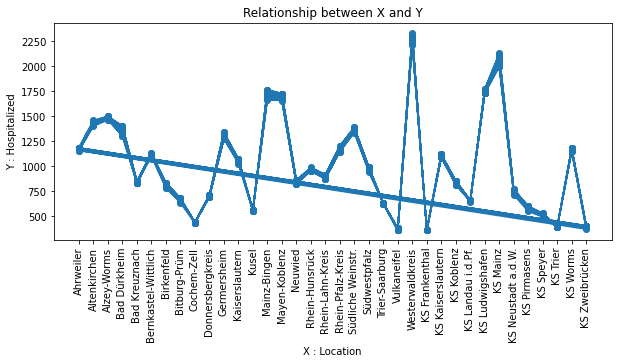

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Set the figure size as desired

# Assuming 'data' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x = data['Location']
y = data['Hospitalized']

plt.scatter(x, y)  # Scatter plot
# or
plt.plot(x, y)  # Line plot

# Add labels and title
plt.xlabel('X : Location')
plt.ylabel('Y : Hospitalized')
plt.title('Relationship between X and Y')




plt.xticks(rotation = 'vertical')  


# Display the plot
plt.show()


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

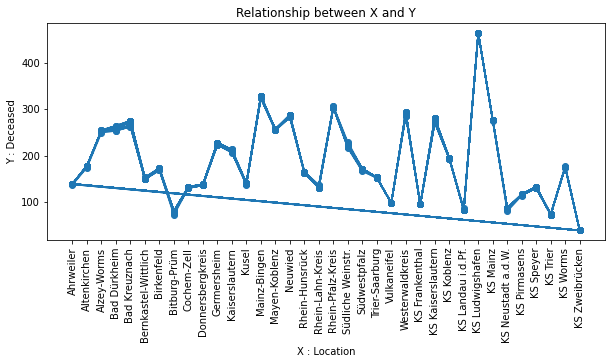

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Set the figure size as desired

# Assuming 'data' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x = data['Location']
y = data['Deceased']

plt.scatter(x, y)  # Scatter plot
# or
plt.plot(x, y)  # Line plot

# Add labels and title
plt.xlabel('X : Location')
plt.ylabel('Y : Deceased')
plt.title('Relationship between X and Y')




plt.xticks(rotation = 'vertical')  


# Display the plot
plt.show()


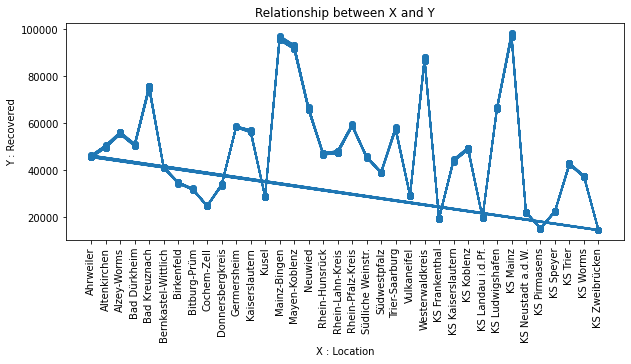

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Set the figure size as desired

# Assuming 'data' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x = data['Location']
y = data['Recovered']

plt.scatter(x, y)  # Scatter plot
# or
plt.plot(x, y)  # Line plot

# Add labels and title
plt.xlabel('X : Location')
plt.ylabel('Y : Recovered')
plt.title('Relationship between X and Y')




plt.xticks(rotation = 'vertical')  


# Display the plot
plt.show()


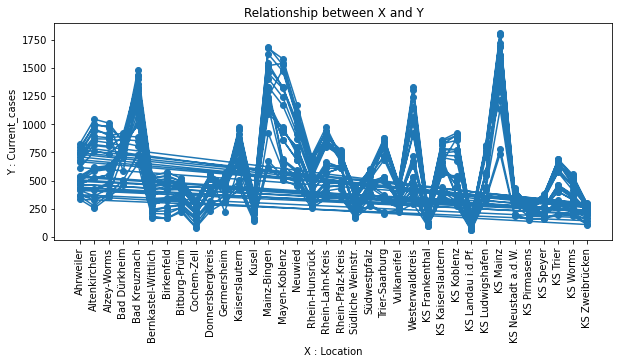

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Set the figure size as desired

# Assuming 'data' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x = data['Location']
y = data['Current_cases']

plt.scatter(x, y)  # Scatter plot
# or
plt.plot(x, y)  # Line plot

# Add labels and title
plt.xlabel('X : Location')
plt.ylabel('Y : Current_cases')
plt.title('Relationship between X and Y')




plt.xticks(rotation = 'vertical')  


# Display the plot
plt.show()


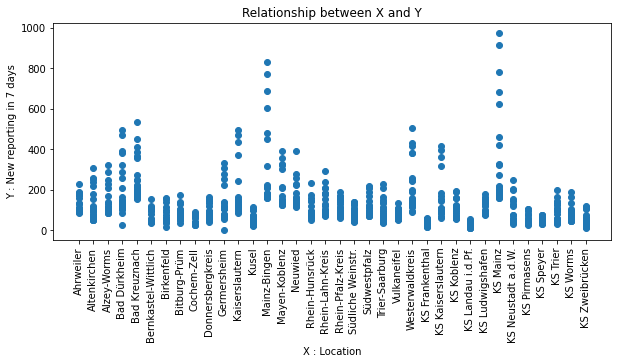

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Set the figure size as desired

# Assuming 'data' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x = data['Location']
y = data['New reporting in 7 days']

plt.scatter(x, y)  # Scatter plot
# or
#plt.plot(x, y)  # Line plot

# Add labels and title
plt.xlabel('X : Location')
plt.ylabel('Y : New reporting in 7 days')
plt.title('Relationship between X and Y')




plt.xticks(rotation = 'vertical')  


# Display the plot
plt.show()


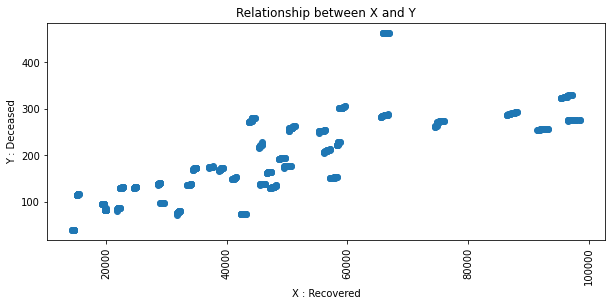

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Set the figure size as desired

# Assuming 'data' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x = data['Recovered']
y = data['Deceased']

plt.scatter(x, y)  # Scatter plot
# or
#plt.plot(x, y)  # Line plot

# Add labels and title
plt.xlabel('X : Recovered')
plt.ylabel('Y : Deceased')
plt.title('Relationship between X and Y')




plt.xticks(rotation = 'vertical')  


# Display the plot
plt.show()


# Now I want to merge datasets and show values together

In [30]:
####done above for january

In [31]:
#Finding only one city values for month of january

In [80]:
import pandas as pd


# Search for a particular value in column 'A'
single_result = data[data['Location'] == 'Ahrweiler']

# Print the result
#print(single_result)
single_result.head(3)

,Location,Lab confirmed total,Lab confirmed: difference to prev day,Hospitalized,Deceased,Recovered,Current_cases,New reporting in 7 days,New reporting last week,Rheinland-Pfalz,+USAFD,<20 Jahre,20-59 Jahre,≥ 60 Jahre,Hospitalized in RLP,Landkreis
0,Ahrweiler,46387,52,1155,137,45503,747,228,223,177.9,177.9,31.1,220.0,193.3,7.29,Ahrweiler
37,Ahrweiler,46439,52,1156,138,45503,798,189,253,147.5,147.5,26.6,204.1,127.3,8.45,Ahrweiler
74,Ahrweiler,46468,29,1159,138,45503,827,184,214,143.6,143.6,26.6,189.9,136.7,9.22,Ahrweiler


In [98]:
# Drop multiple columns
columns_to_drop = ['Location', 'Landkreis']
single_result_n = single_result.drop(columns_to_drop, axis=1)

In [99]:
single_result_n.head(3)

,Lab confirmed total,Lab confirmed: difference to prev day,Hospitalized,Deceased,Recovered,Current_cases,New reporting in 7 days,New reporting last week,Rheinland-Pfalz,+USAFD,<20 Jahre,20-59 Jahre,≥ 60 Jahre,Hospitalized in RLP
0,46387,52,1155,137,45503,747,228,223,177.9,177.9,31.1,220.0,193.3,7.29
37,46439,52,1156,138,45503,798,189,253,147.5,147.5,26.6,204.1,127.3,8.45
74,46468,29,1159,138,45503,827,184,214,143.6,143.6,26.6,189.9,136.7,9.22


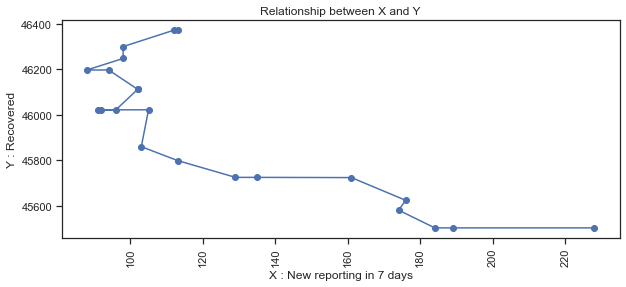

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Set the figure size as desired

# Assuming 'data' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x = single_result_n['New reporting in 7 days']
y = single_result_n['Recovered']

plt.scatter(x, y)  # Scatter plot
# or
plt.plot(x, y)  # Line plot

# Add labels and title
plt.xlabel('X : New reporting in 7 days')
plt.ylabel('Y : Recovered')
plt.title('Relationship between X and Y')




plt.xticks(rotation = 'vertical')  


# Display the plot
plt.show()


(array([4., 1., 3., 1., 1., 4., 0., 4., 1., 3.]),
 array([45503. , 45589.9, 45676.8, 45763.7, 45850.6, 45937.5, 46024.4,
        46111.3, 46198.2, 46285.1, 46372. ]),
 <BarContainer object of 10 artists>)

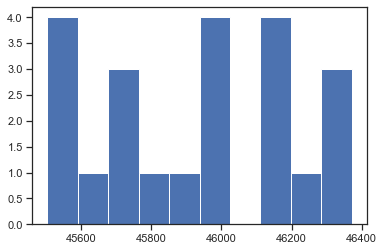

In [101]:
# Create a histogram
plt.hist(single_result_n['Recovered'], bins=10)

(array([2., 3., 0., 6., 1., 1., 1., 2., 2., 4.]),
 array([1155. , 1157.9, 1160.8, 1163.7, 1166.6, 1169.5, 1172.4, 1175.3,
        1178.2, 1181.1, 1184. ]),
 <BarContainer object of 10 artists>)

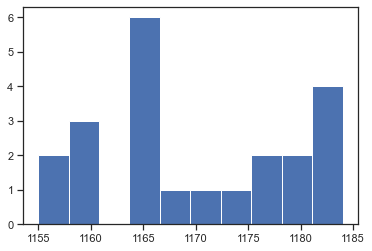

In [102]:
# Create a histogram
plt.hist(single_result['Hospitalized'], bins=10)

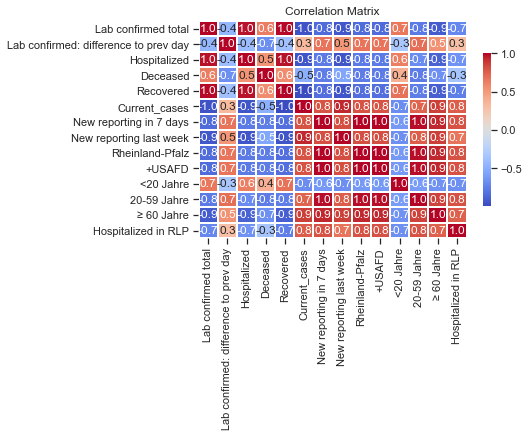

<Figure size 720x576 with 0 Axes>

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numerical columns from correlation calculation
#numerical_df = single_result_n.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = single_result_n.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',cbar_kws={'shrink': 0.7},linecolor='white',fmt='.1f', linewidths=2.0)

# Set the plot title
plt.title('Correlation Matrix')

# Set the figure size
plt.figure(figsize=(10,8))

# Rotate the x-axis labels for better readability (optional)
#plt.xticks(rotation=45)


# Display the plot
plt.show()


In [144]:
#Correlations

In [161]:
# Calculate Pearson correlation
pearson_corr = single_result_n[['Recovered', 'Hospitalized']].corr(method='pearson').iloc[0, 1]

# Calculate Spearman correlation
spearman_corr = single_result_n[['Recovered', 'Hospitalized']].corr(method='spearman').iloc[0, 1]


# Calculate Kendalltau correlation
kendalltau_corr = single_result_n[['Recovered', 'Hospitalized']].corr(method='kendall').iloc[0, 1]


print('Pearson correlation:', pearson_corr)
print('Spearman correlation:', spearman_corr)
print('kendalltau correlation:', kendalltau_corr)


Pearson correlation: 0.9692787380376631
Spearman correlation: 0.9900260101527684
kendalltau correlation: 0.9611009145520287


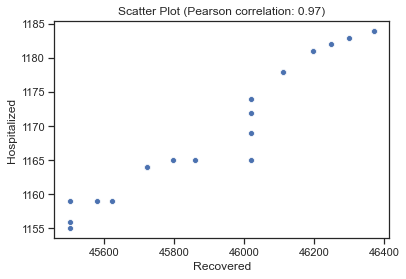

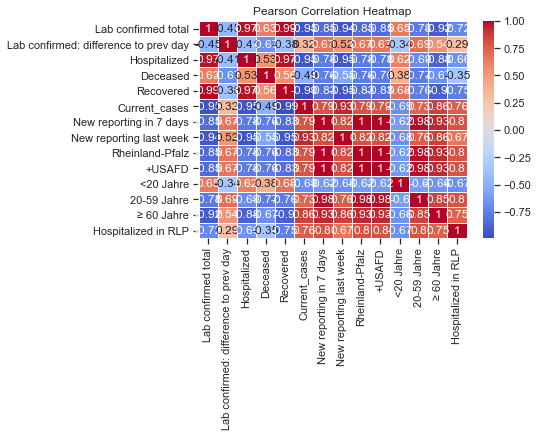

In [164]:
#pearson
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(single_result_n['Recovered'], single_result_n['Hospitalized'])

# Calculate the correlation matrix
correlation_matrix = single_result_n.corr()

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=single_result_n, x='Recovered', y='Hospitalized')
plt.title('Scatter Plot (Pearson correlation: {:.2f})'.format(correlation_coefficient))
plt.xlabel('Recovered')
plt.ylabel('Hospitalized')

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')


# Show the plot
plt.show()




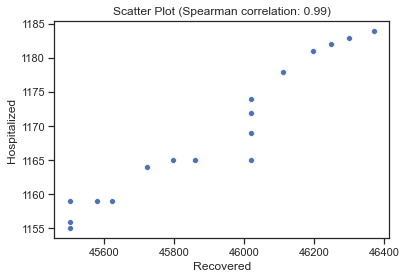

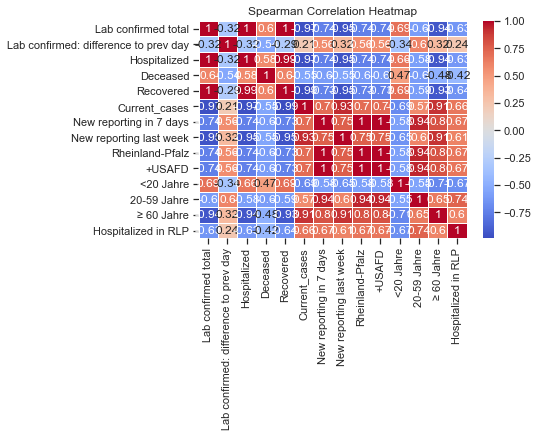

In [165]:
#Spearman correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


# Calculate the Spearman correlation coefficient and p-value
correlation_coefficient, _ = spearmanr(single_result_n['Recovered'], single_result_n['Hospitalized'])

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=single_result, x='Recovered', y='Hospitalized')
plt.title('Scatter Plot (Spearman correlation: {:.2f})'.format(correlation_coefficient))
plt.xlabel('Recovered')
plt.ylabel('Hospitalized')

# Show the scatter plot
plt.show()

# Create a heatmap of the Spearman correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(single_result_n.corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')

# Show the heatmap
plt.show()


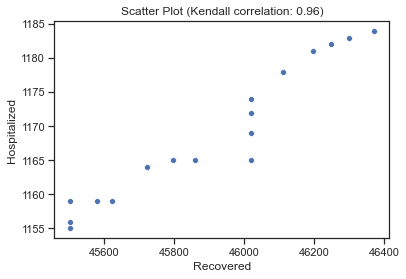

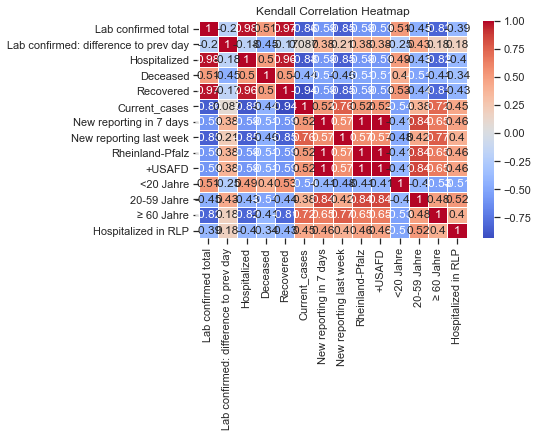

In [166]:
## Kendalltau correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

#Calculate the Kendall's tau correlation coefficient and p-value
correlation_coefficient1, _ = kendalltau(single_result_n['Recovered'], single_result_n['Hospitalized'])

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=single_result_n, x='Recovered', y='Hospitalized')
plt.title('Scatter Plot (Kendall correlation: {:.2f})'.format(correlation_coefficient1))
plt.xlabel('Recovered')
plt.ylabel('Hospitalized')

# Show the scatter plot
plt.show()

# Create a heatmap of the Kendall's tau correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(single_result_n.corr(method='kendall'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Kendall Correlation Heatmap')

# Show the heatmap
plt.show()
